# Introduction to Google Cloud Platform and TensorFlow

## Introduction

This tutorial will introduce you to Google Cloud Compute Engine and TensorFlow. We will go through the basics of tensorflow and implement linear regression, classification and neural networks in tensorflow and run them on Google standalone compute engine. Then, we will submit our model to google cloud which can handle large amounts of data and computational requirement. Often times, Companies buy cloud resources from Goolge or AWS for their Data Science infrastucture instead of buying on-the-premise hardware. We will know how they implement their ML projects using google cloud.

Note: This tutorial assumes that you know about linear regression, classification and mnist digit classification.This tutorial has been run on GCP and it might not work on local computer or AWS. It requires tensorflow installed and connectivity to the GCP disk storage. It is advisable to run this notebook on GCP and not on any other platforms.

In [1]:
#This cell has been put to support the hosting of images on jupyter notebook from github

from IPython.display import Image
from IPython.core.display import HTML


## Tutorial content

In this tutorial, we will learn how to setup the Google VM ( Compute Engine ) and start the Datalab ( Jupyter Notebook ), and then run the ML models using Tensorflow.

We will be using sample data for the ML models. Our focus here is to know the implementation of ML models using Tensorflow than data, hence sample data has been chosen and more focus is given to implementation part. However, for nerual networks, the classical example of MNIST numbers identification has been chosen.


We will cover the following topics in this tutorial:

   [Setting up the Google Cloud Platform Account](#Setting-up-the-Google-Cloud-Platform-Account---Free-Trial)

   [Starting the Compute Engine VM](#Starting-the-Compute-Engine-VM)

   [Connecting to Datalab](#Connecting-to-Datalab)

   [Basics of Tensorflow](#Basics-of-Tensorflow)

   [Linear Regression](#Linear-Regression)

   [Classification](#Classification)

   [Neural Networks](#Neural-Networks)

   [Scaling up ML using Cloud ML Engine](#Scaling-up-ML-using-Cloud-ML-Engine)

   [References](#References:)



## Setting up the Google Cloud Platform Account - Free Trial

Follow the instructions mentioned here to set up a google cloud platform account https://codelabs.developers.google.com/codelabs/cpb100-free-trial/index.html#0 

you need to have a google account and follow the steps carefully.
You will be given a credit of $300 valid for one year.

Required Time: 10 mins

After successfull setup, You should get a GCP homepage like this:

![](https://github.com/sathwikcm/pds-tutorial/raw/master/gcp_home.PNG)

## Starting the Compute Engine VM 

After you have successfully set up your account, start the compute engine by following these instructions https://codelabs.developers.google.com/codelabs/dataeng-machine-learning/index.html?index=#0 

or you can start from the homepage as follows as: 

HomePage -> Options -> Compute -> Compute Engine -> VM Instance -> Create new instance 

![](https://github.com/sathwikcm/pds-tutorial/raw/master/vm.PNG)

Note: Before creating any instance, please make sure whether the selected features of the product(or instance) are within the free trial limits or not. Google cloud will prompt you when you try to activate billable services but be careful.


## Connecting to Datalab

Datalab is like a Jupyter Notebook where you run your Python code and see the results. In google terms, Jupyter Notebook is Datalab, but with most Google-like features embedded into it. After the VM is started, follow these instructions to start the Datalab

Step 1: In Google Cloud Shell, type:
*gcloud compute zones list*

Pick a zone in a geographically closeby region.

Step 2: In Google Cloud Shell, type:
*datalab create dataengvm --zone USER_INPUT_SELECTED_ZONE_NAME*

This step will take about 3-5 minutes to start. Follow the prompts during this process. If you are not yet familiar with Datalab, follow this:

![](https://github.com/sathwikcm/pds-tutorial/raw/master/datalab.PNG)

For more information: https://codelabs.developers.google.com/codelabs/dataeng-machine-learning/index.html?index=#2 

Or, if you are starting the VM using UI, then follow these instructions:
Google Cloud Platform console -> Options -> Products and Services -> Compute Engine -> VM Instances -> Start the VM

After the VM starts, Open the google cloud shell, and run the following command to get the datalab:
datalab connect --zone us-east1-b --port 8081 dataengvm
Note: this command is not specified in the intial instructions, it took me time to get this command. Hence I am providing it explicitly so that you do not create a VM repeatedly. You need to create a VM only once, and the reuse it whenever you want. Also, dont forget to stop it when you are done with your work.

![](https://github.com/sathwikcm/pds-tutorial/raw/master/command.PNG)

Successful datalab opening in browswer should look like this:

![](https://github.com/sathwikcm/pds-tutorial/raw/master/gcd.PNG)

Now, we are all set for building ML models in Google compute engine datalab. The following exercises will explain how to implement the basic models in tensorflow. Note: Here we are focussing on the implementation ( syntax, functions, the details of programming in tensorflow ) of models in tensorflow and not really on the actual data.

## Basics of Tensorflow

TensorFlow is an open source software library for numerical computation using data-flow graphs. It was originally developed by the Google Brain Team within Google's Machine Intelligence research organization for machine learning and deep neural networks research.

TensorFlow is cross-platform. It runs on nearly everything: GPUs and CPUs—including mobile and embedded platforms—and even tensor processing units (TPUs), which are specialized hardware to do tensor math on. 

For more info: https://www.tensorflow.org/

Following picture shows the interface of tensorflow:

![](https://github.com/sathwikcm/pds-tutorial/raw/master/1tensorflow.png)

TensorFlow allows to build data flow graphs and allows us to better apply numerical computation on it in a easier way. Thus, it helps us to build deep neural networks. A deep neural network is neural network having two or more hidden layers. Data is passed in the form of multidimensional arrays which are called Tensors. Within each graph, each node represents mathematical operations and edges of graphs represents tensors. 

Tensor: n-dimensional array 

Flow: data flow computational framework ( like mapreduce )

for example: 

![](https://github.com/sathwikcm/pds-tutorial/raw/master/graph.PNG)


#### We will see how numerical computation like addition, subtraction and multiplication are done in Tensorflow.

The way the tensorflow works is that first, we need to build a computational graph or a model .The model could be any number of nodes from 1 to n. Then after the model is ready then, we create a tensorflow session and start the session with the input nodes. When session's run method is called then only all the computation will happen. ( lazy evaluation )

In [6]:
# import tensorflow
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

# build computational graph
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
#Placeholders are like the variable with no value on them but later we can place the value on it. 
#tf.Placeholder is used to feed actual training data

#Add logic
addition = tf.add(a, b)
subtraction = tf.subtract(a, b)
multiply = tf.multiply(a, b)


# initialize variables
init = tf.global_variables_initializer()
#Since first we build a model so we have to run the initializer in the session first.

# create session and run the graph
#To run them we need to create a tensorflow session as: 
with tf.Session() as sess:
    sess.run(init)
    print("Addition: %i" % sess.run(addition, feed_dict={a: 2, b: 3}))
    print ("Subtraction: %i" % sess.run(subtraction, feed_dict={a: 2, b: 3}))
    print ("Multiply: %i" % sess.run(multiply, feed_dict={a: 2, b: 3}))

# close session
sess.close()

Addition: 5
Subtraction: -1
Multiply: 6


## Linear Regression 

case 1: Linear regression using Gradient Descent

First, we will implement the linear regression in tensorflow using gradient descent optimization.
and then we will use the estimator.

Linear regression is a supervised machine learning approach for modeling a linear relationship between a dependent variable and one or more independent variables. In very simple words, it is an approach to create a straight line or a model from discrete values and generate an output which is continuous. 

Epoch : 400 cost= 0.084393904 weight= 0.2978773 constant= 0.45411676
Epoch : 800 cost= 0.079749130 weight= 0.27915746 constant= 0.5887861
Epoch : 1200 cost= 0.078014463 weight= 0.26769587 constant= 0.6712396
Epoch : 1600 cost= 0.077368155 weight= 0.26067758 constant= 0.72172874
Epoch : 2000 cost= 0.077128291 weight= 0.25637951 constant= 0.7526493
Epoch : 2400 cost= 0.077039897 weight= 0.25374752 constant= 0.7715835
Epoch : 2800 cost= 0.077007689 weight= 0.25213587 constant= 0.78317773
Epoch : 3200 cost= 0.076996207 weight= 0.2511506 constant= 0.7902656
Epoch : 3600 cost= 0.076992281 weight= 0.25054836 constant= 0.7945974
Epoch : 4000 cost= 0.076990977 weight= 0.250179 constant= 0.7972556
Epoch : 4400 cost= 0.076990627 weight= 0.24995302 constant= 0.7988808
Epoch : 4800 cost= 0.076990604 weight= 0.2498157 constant= 0.7998687

Training cost= 0.0769906 W= 0.24976835 b= 0.8002097 



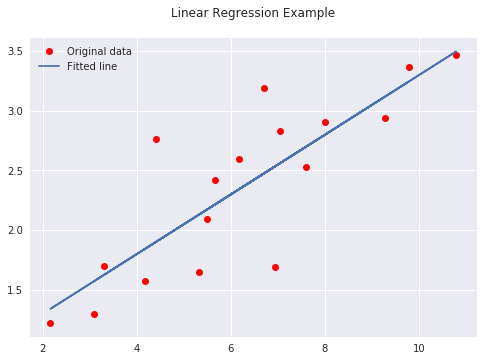

In [8]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 5000
step = 400

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
weight = tf.Variable(rng.randn(), name="weight")
constant = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, weight), constant)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch :", '%3d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "weight=", sess.run(weight), "constant=", sess.run(constant))

    
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("\nTraining cost=", training_cost, "W=", sess.run(weight), "b=", sess.run(constant), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(weight) * train_X + sess.run(constant), label='Fitted line')
    plt.title("Linear Regression Example\n")
    plt.legend()
    plt.show()
    plt.show()

As you can see, with each epoch, the cost value decreases. Each epoch is one training iteration, so in every iteration all training samples are iterated once. When calling the tensorflow model's train function with the parameter epochs, you are actually setting how many times your model should be trained on your training data. In short, Epoch: One pass through the whole training data. Batch size: The number of samples seen in one batch. If there are 10000 examples and the batch size is 1000, then there will be 100 steps per epoch. The Epochs and batch size completely define the number of steps.

## Linear regresison using inbuilt TensorFlow Estimator

Let us see how we can implement different models using the inbuilt estimators. The current example deals with the automobile data where cylinders ,displacement ,	horsepower, 	weight, 	acceleration are the features ( independent variables) and mpg ( miles per gallon ) is the dependent variable.

please download the data from https://www.dropbox.com/sh/6i5p29pckqorg0i/AAAAjZ0_7SGSO4kJVLBp4u8ea?dl=0

In [9]:
#Example dataset 

import numpy as np
import tensorflow as tf
import pandas as pd
df = pd.read_csv("mpg.csv")
new_df =df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','mpg']]
new_df.head()

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8,307.0,130,3504,12.0,18.0
1,8,350.0,165,3693,11.5,15.0
2,8,318.0,150,3436,11.0,18.0
3,8,304.0,150,3433,12.0,16.0
4,8,302.0,140,3449,10.5,17.0


In [10]:
y_name="mpg"
train_fraction=0.8
path="mpg_train.csv"
import collections

defaults = collections.OrderedDict([
    ("mpg", [0.0]), ("cylinders", [0.0]), ("displacement", [0.0]), ("horsepower", [0.0]), ("weight", [0.0]), ("acceleration", [0.0])])

def decode_line(line):
    """Convert a csv line into a (features_dict,label) pair."""
    # Decode the line to a tuple of items based on the types of
    # csv_header.values().
    items = tf.decode_csv(line, list(defaults.values()))

    # Convert the keys and items to a dict.
    pairs = zip(defaults.keys(), items)
    features_dict = dict(pairs)

    # Remove the label from the features_dict
    label = features_dict.pop(y_name)

    return features_dict, label
def in_training_set(line):
    """Returns a boolean tensor, true if the line is in the training set."""
    # If you randomly split the dataset you won't get the same split in both
    # sessions if you stop and restart training later. Also a simple
    # random split won't work with a dataset that's too big to `.cache()` as
    # we are doing here.
    num_buckets = 1000000
    bucket_id = tf.string_to_hash_bucket_fast(line, num_buckets)
    # Use the hash bucket id as a random number that's deterministic per example
    return bucket_id < int(train_fraction * num_buckets)

def in_test_set(line):
    """Returns a boolean tensor, true if the line is in the training set."""
    # Items not in the training set are in the test set.
    # This line must use `~` instead of `not` because `not` only works on python
    # booleans but we are dealing with symbolic tensors.
    return ~in_training_set(line)

  
base_dataset = (tf.data.TextLineDataset(path))

train = (base_dataset.filter(in_training_set).map(decode_line).cache())

  # Do the same for the test-set.
test = (base_dataset.filter(in_test_set).cache().map(decode_line))



now, train the model

In [12]:
import numpy as np
import tensorflow as tf


def input_train():
    return (
      train.shuffle(1000).batch(128)
      .repeat().make_one_shot_iterator().get_next())

def input_test():
    return (test.shuffle(1000).batch(128)
          .make_one_shot_iterator().get_next())

feature_columns = [
tf.feature_column.numeric_column(key="cylinders"),
tf.feature_column.numeric_column(key="displacement"),
tf.feature_column.numeric_column(key="horsepower"),
tf.feature_column.numeric_column(key="weight"),
tf.feature_column.numeric_column(key="acceleration")
]


model = tf.estimator.LinearRegressor(feature_columns=feature_columns)

STEPS = 2000
model.train(input_fn=input_train, steps=STEPS)

eval_result = model.evaluate(input_fn=input_test)

average_loss = eval_result["average_loss"]

print("\nRMS error for the validation dataset: {:.0f}".format(average_loss))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb2d1f48b38>, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_model_dir': '/tmp/tmphn9m_tzb', '_service': None, '_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_task_type': 'worker', '_save_checkpoints_steps': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmphn9m_tzb/model.ckpt.
INFO:tensorflow:loss = 74711.67, step = 1
INFO:tensorflow:global_step/sec: 335.479
INFO:tensorflow:loss = 13650.091, step = 101 (0.310 sec)
INFO:tensorflow:global_step/sec: 674.344
INFO:tensorflow:loss = 2898.1667, step = 201 (0.143 sec)
INFO:tensorflow:global_step/sec: 1031.84
INFO:tensorflow:loss = 

Test the model using test data

In [26]:
test_df = pd.read_csv("mpg_test.csv")
test_df.columns =['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
test_df.head()

# Run the model in prediction mode.
 #18 15 18 16 
input_dict = {
    "cylinders": np.array(test_df['cylinders']),
    "displacement": np.array(test_df['displacement']),
   "horsepower": np.array(test_df['horsepower']),
   "weight": np.array(test_df['weight']),
   "acceleration": np.array(test_df['acceleration'])
}
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    input_dict, shuffle=False)
predict_results = model.predict(input_fn=predict_input_fn)

true_y = np.array(test_df['mpg'])
slno=0
pred_y=[]
for i in predict_results:
    print(i)
    pred_y.append(i['predictions'][0])

from sklearn.metrics import mean_squared_error
print("\nRMS error for the test dataset: {:.0f}".format(mean_squared_error(true_y, np.array(pred_y))))



INFO:tensorflow:Restoring parameters from /tmp/tmphn9m_tzb/model.ckpt-2000
{'predictions': array([22.338066], dtype=float32)}
{'predictions': array([25.609015], dtype=float32)}
{'predictions': array([22.322239], dtype=float32)}
{'predictions': array([23.439093], dtype=float32)}
{'predictions': array([25.136236], dtype=float32)}
{'predictions': array([23.140158], dtype=float32)}
{'predictions': array([23.665665], dtype=float32)}
{'predictions': array([24.303053], dtype=float32)}
{'predictions': array([24.963373], dtype=float32)}
{'predictions': array([14.478992], dtype=float32)}
{'predictions': array([21.905663], dtype=float32)}
{'predictions': array([16.634184], dtype=float32)}
{'predictions': array([23.884172], dtype=float32)}
{'predictions': array([20.933928], dtype=float32)}
{'predictions': array([27.673174], dtype=float32)}
{'predictions': array([26.076603], dtype=float32)}
{'predictions': array([30.060194], dtype=float32)}
{'predictions': array([19.227854], dtype=float32)}
{'predi

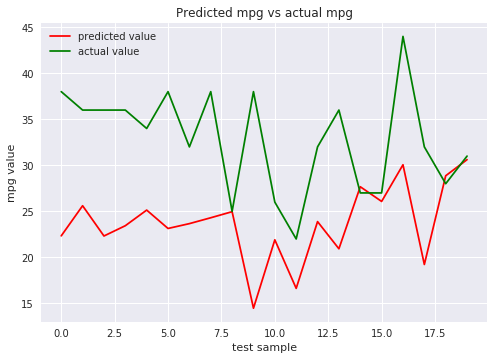

In [30]:
plt.plot(pred_y,color="red",label="predicted value")
plt.plot(true_y,color="green",label="actual value")
plt.title("Predicted mpg vs actual mpg")
plt.ylabel("mpg value")
plt.xlabel("test sample")
plt.legend()
plt.show()

## Classification

Let us take iris data and classify the data points into different species

In [34]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

data = load_iris(return_X_y = True)

X=data[0]
y=data[1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

feats = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

classifier_tf = tf.contrib.learn.DNNClassifier(feature_columns=feats, 
                                               hidden_units=[50, 50, 50], 
                                               n_classes=3)
classifier_tf.fit(X_train, y_train, steps=1000)

predictions = list(classifier_tf.predict(X_test, as_iterable=True))
score = accuracy_score(y_test, predictions)
print("\n The accuracy score of this classifier is ",score)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb2ca9325c0>, '_log_step_count_steps': 100, '_task_id': 0, '_tf_random_seed': None, '_master': '', '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpcf5qkusp', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_is_chief': True, '_num_ps_replicas': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_environment': 'local', '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_checkpoints_steps': None, '_task_type': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpcf5qkusp/model.ckpt.
INFO:tensorflow:loss = 1.1205263, step = 1
INFO:tensorflow:global_step/sec: 299.97
INFO:tensorflow:loss = 0.1820875, step = 101 (0.339 sec)
INFO:tensorflow:global_step/sec: 627.32
INFO:tensorflow:loss =

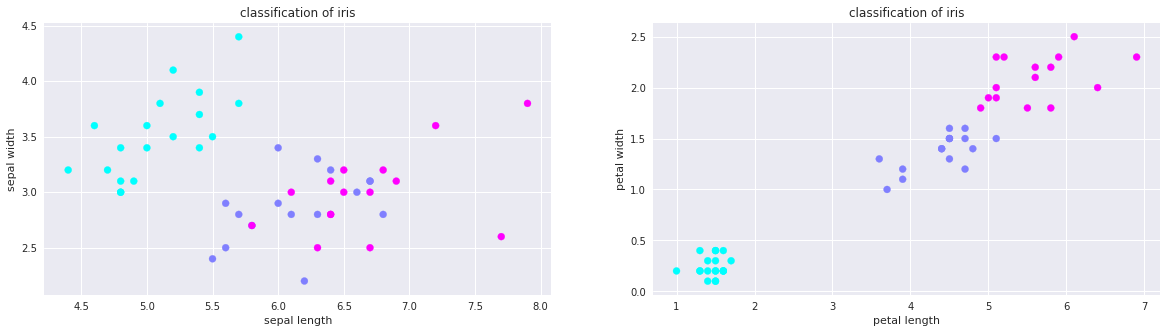

In [53]:
import pylab
test_dataset = pd.DataFrame(X_test) 
test_dataset['labels']=predictions
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(test_dataset[0],test_dataset[1],c=test_dataset['labels'],cmap=pylab.cm.cool)
plt.title("classification of iris")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.subplot(1,2,2)
plt.scatter(test_dataset[2],test_dataset[3],c=test_dataset['labels'],cmap=pylab.cm.cool)
plt.title("classification of iris")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

## Neural Networks

TensorFlow is essentially a framework for building Deep Learning Neural Networks. Neural neworks are typically organized in layers. Layers are made up of a number of interconnected 'nodes' which contain an 'activation function'. Patterns are presented to the network via the 'input layer', which communicates to one or more 'hidden layers' where the actual processing is done via a system of weighted 'connections'. The hidden layers then link to an 'output layer' where the answer is output as shown in the graphic below.

![](https://github.com/sathwikcm/pds-tutorial/raw/master/simple_neural_network_header.jpg)

Most ANNs contain some form of 'learning rule' which modifies the weights of the connections according to the input patterns that it is presented with. In a sense, ANNs learn by example as do their biological counterparts; a child learns to recognize dogs from examples of dogs.

Although there are many different kinds of learning rules used by neural networks, this demonstration is concerned only with one; the delta rule. The delta rule is often utilized by the most common class of ANNs called 'backpropagational neural networks' (BPNNs). Backpropagation is an abbreviation for the backwards propagation of error.

With the delta rule, as with other types of backpropagation, 'learning' is a supervised process that occurs with each cycle or 'epoch' (i.e. each time the network is presented with a new input pattern) through a forward activation flow of outputs, and the backwards error propagation of weight adjustments. More simply, when a neural network is initially presented with a pattern it makes a random 'guess' as to what it might be. It then sees how far its answer was from the actual one and makes an appropriate adjustment to its connection weights.

![](https://github.com/sathwikcm/pds-tutorial/raw/master/back.png)

### CNN Overview


A convolutional neural network is a class of deep, feed-forward networks, composed of one or more convolutional layers with fully connected layers (matching those in typical ANNs) on top. It uses tied weights and pooling layers. In particular, max-pooling is often structured via Fukushima's convolutional architecture. This architecture allows CNNs to take advantage of the 2D structure of input data.

CNNs are suitable for processing visual and other two-dimensional data. They have shown superior results in both image and speech applications. They can be trained with standard backpropagation. CNNs are easier to train than other regular, deep, feed-forward neural networks and have many fewer parameters to estimate.


#### Example:  MNIST  handwritten digits

To understand the neural networks, we will use the most general example of MNIST handwritten digits. This dataset contains 60,000 examples for training and 10,000 examples for testing. 
For more information visit: http://yann.lecun.com/exdb/mnist/ 


![](https://github.com/sathwikcm/pds-tutorial/raw/master/image.png)

Let us see the implementation above mentioned ideas in tensorflow code

In [54]:
from __future__ import division, print_function, absolute_import

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

# Training Parameters
num_steps = 1000
learning_rate = 0.005
batch_size = 256

# Network Parameters
num_input = 784 
# image size  28*28
num_classes = 10 
# Number of classes  i.e 0-9 digits
dropout = 0.25 
# Dropout probability 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Now we will add each layer to the model as mentioned in the diagram. This is where the actual compuational layers are present. This is can be quite complex at the begining. Basically we are basiccaly adding different layers as mentioned in the above picture. Add the layers according to the CNN definition and changed parameters according to the need.


In [55]:
# source: https://github.com/aymericdamien/TensorFlow-Examples


def neural_network_function(x_dict, n_classes, dropout, reuse, is_training):
    
    with tf.variable_scope('ConvNet', reuse=reuse):
       
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        # Convolution Layer with 32 filters and a kernel size of 5
        layer1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        layer1 = tf.layers.max_pooling2d(layer1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        layer2 = tf.layers.conv2d(layer1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        layer2 = tf.layers.max_pooling2d(layer2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fclayer1 = tf.contrib.layers.flatten(layer2)

        # Fully connected layer (in tf contrib folder for now)
        fclayer1 = tf.layers.dense(fclayer1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fclayer1 = tf.layers.dropout(fclayer1, rate=dropout, training=is_training)

        # Output layer, class prediction
        final_layer = tf.layers.dense(fclayer1, n_classes)

    return final_layer

since tensorflow estimate api takes input, test and models as functions. write the model function with train and test datasets in it.


In [56]:
# Define the model function (following TF Estimator Template) from the official website help
def model_fn(features, labels, mode):
    
    #Building the neural network for both train and test sets 
    
    logits_train = neural_network_function(features, num_classes, dropout, reuse=False, is_training=True)
    logits_test = neural_network_function(features, num_classes, dropout, reuse=True, is_training=False)
    
    #Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    #If prediction mode, early return - Escapse case
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    #loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    #accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    #return specifications
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [57]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb2cad6dd68>, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_model_dir': '/tmp/tmpuuwx91mk', '_service': None, '_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_task_type': 'worker', '_save_checkpoints_steps': None}


In [58]:

input_fn = tf.estimator.inputs.numpy_input_fn(    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpuuwx91mk/model.ckpt.
INFO:tensorflow:loss = 2.320078, step = 1
INFO:tensorflow:global_step/sec: 1.01448
INFO:tensorflow:loss = 0.06634214, step = 101 (98.582 sec)
INFO:tensorflow:global_step/sec: 1.00808
INFO:tensorflow:loss = 0.07868254, step = 201 (99.198 sec)
INFO:tensorflow:global_step/sec: 1.13278
INFO:tensorflow:loss = 0.13023096, step = 301 (88.275 sec)
INFO:tensorflow:global_step/sec: 1.07878
INFO:tensorflow:loss = 0.025793694, step = 401 (92.700 sec)
INFO:tensorflow:global_step/sec: 1.03815
INFO:tensorflow:loss = 0.07198884, step = 501 (96.325 sec)
INFO:tensorflow:global_step/sec: 0.873829
INFO:tensorflow:loss = 0.031852927, step = 601 (114.437 sec)
INFO:tensorflow:Saving checkpoints for 614 into /tmp/tmpuuwx91mk/model.ckpt.
INFO:tensorflow:global_step/sec: 1.44011
INFO:tensorflow:loss = 0.03958378, step = 701 (69.439 sec)
INFO:tensorflow:global_step/sec: 1.4124
INFO:tensorflow:lo

Now, train the model with images dataset

In [59]:
input_fn = tf.estimator.inputs.numpy_input_fn( x={'images': mnist.test.images}, y=mnist.test.labels,
                                              batch_size=batch_size, shuffle=False)

model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-03-31-07:06:55
INFO:tensorflow:Restoring parameters from /tmp/tmpuuwx91mk/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-31-07:07:05
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9853, global_step = 1000, loss = 0.0459605


{'accuracy': 0.9853, 'global_step': 1000, 'loss': 0.0459605}

now, test the model on test dataset

INFO:tensorflow:Restoring parameters from /tmp/tmpuuwx91mk/model.ckpt-1000


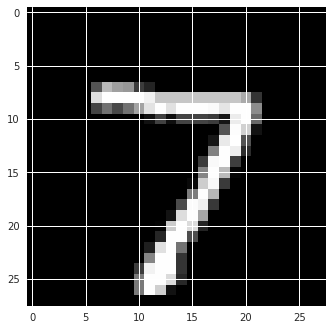

Image prediction: 7


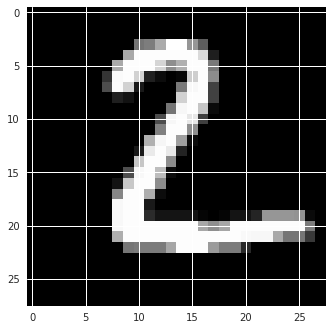

Image prediction: 2


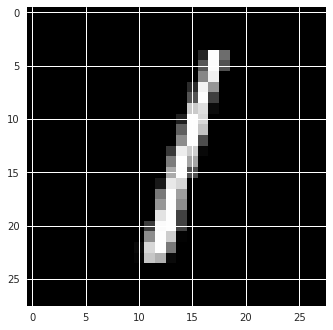

Image prediction: 1


In [62]:
test_images = mnist.test.images[:3]
input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': test_images}, shuffle=False)
predicted_images = list(model.predict(input_fn))

for i in range(3):
    plt.imshow(np.reshape(images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Image prediction:", predicted_images[i])

# Scaling up ML using Cloud ML Engine

we will take a previously developed TensorFlow model to predict taxifare rides and package it up so that it can be run in Cloud MLE. For now, we'll run this on a small dataset. The model that was developed is rather simplistic, and therefore, the accuracy of the model is not great either. However, this notebook illustrates how to package up a TensorFlow model to run it within Cloud ML.

With this knowledge,one can use the Cloud MLE to run heavy loads and complex ML models. Follow the steps carefully as the environmental variables play a key role in submitting the job to the cloud. In short, the steps are:

1. Setting up the storage bucket
2. Configuring the environmental variables
3. copying the data to cloud
4. Training the model
5. Deploying the model
6. Prediction



### Environment variables for project and bucket

Note that: Your project id is the unique string that identifies your project (not the project name). You can find this from the GCP Console dashboard's Home page. Cloud training often involves saving and restoring model files. Therefore, we should create a single-region bucket.

Create a bucket as follows:
GCP Homepage -> Options-> Storage -> Browse -> create a bucket

![](https://github.com/sathwikcm/pds-tutorial/raw/master/storage buckets.PNG)





Configure all the environmental variables as follows:

In [4]:
import os
PROJECT = 'pds-tutorial-198900 ' # REPLACE WITH YOUR PROJECT ID
BUCKET = 'cloud-t-cmsathwik7vk' # REPLACE WITH YOUR BUCKET NAME
REGION = 'us-central1' # REPLACE WITH YOUR BUCKET REGION e.g. us-central1
REPO = "/content/datalab/training-data-analyst"
os.environ['PROJECT'] = PROJECT
os.environ['BUCKET'] = BUCKET
os.environ['REGION'] = REGION
os.environ['REPO'] = REPO

In [5]:
%bash
gcloud config set project $PROJECT
gcloud config set compute/region $REGION

Updated property [core/project].
Updated property [compute/region].


 Submit training job using gcloud

First copy the training data to the cloud. Then, launch a training job.
you can get the training-data-analyst data from https://github.com/GoogleCloudPlatform/training-data-analyst 

In [9]:
%bash
echo $BUCKET
gsutil -m rm -rf gs://${BUCKET}/taxifare/smallinput/
gsutil -m cp ${REPO}/courses/machine_learning/datasets/*.csv gs://${BUCKET}/taxifare/smallinput/

cloud-t-cmsathwik7vk


Removing gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi-test.csv#1522516706181652...
Removing gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi-train.csv#1522516706224207...
Removing gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi-valid.csv#1522516706207941...
/ [3/3 objects] 100% Done                                                       
Operation completed over 3 objects.                                              
Copying file:///content/datalab/training-data-analyst/courses/machine_learning/datasets/taxi-test.csv [Content-Type=text/csv]...
Copying file:///content/datalab/training-data-analyst/courses/machine_learning/datasets/taxi-train.csv [Content-Type=text/csv]...
Copying file:///content/datalab/training-data-analyst/courses/machine_learning/datasets/taxi-valid.csv [Content-Type=text/csv]...
/ [3/3 files][580.6 KiB/580.6 KiB] 100% Done                                    
Operation completed over 3 objects/580.6 KiB.                                    


Data can be seen as follows:
![](https://github.com/sathwikcm/pds-tutorial/raw/master/data in bucket.PNG)
![](https://github.com/sathwikcm/pds-tutorial/raw/master/datafull.PNG)

Now, submit the training part as a job to the cloud MLE. this step can take 10-20 mins depending on the data and number of epochs of the training. 

In [10]:
%%bash
OUTDIR=gs://${BUCKET}/taxifare/smallinput/taxi_trained
JOBNAME=lab3a_$(date -u +%y%m%d_%H%M%S)
echo $OUTDIR $REGION $JOBNAME
gsutil -m rm -rf $OUTDIR
gcloud ml-engine jobs submit training $JOBNAME \
   --region=$REGION \
   --module-name=trainer.task \
   --package-path=${REPO}/courses/machine_learning/cloudmle/taxifare/trainer \
   --job-dir=$OUTDIR \
   --staging-bucket=gs://$BUCKET \
   --scale-tier=BASIC \
   --runtime-version=1.0 \
   -- \
   --train_data_paths="gs://${BUCKET}/taxifare/smallinput/taxi-train*" \
   --eval_data_paths="gs://${BUCKET}/taxifare/smallinput/taxi-valid*"  \
   --output_dir=$OUTDIR \
   --num_epochs=100

gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi_trained us-central1 lab3a_180331_171954
jobId: lab3a_180331_171954
state: QUEUED


CommandException: 1 files/objects could not be removed.
/tools/google-cloud-sdk/lib/googlecloudsdk/core/util/files.py:622: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  for chunk in iter(lambda: fp.read(4096), ''):
Job [lab3a_180331_171954] submitted successfully.
Your job is still active. You may view the status of your job with the command

  $ gcloud ml-engine jobs describe lab3a_180331_171954

or continue streaming the logs with the command

  $ gcloud ml-engine jobs stream-logs lab3a_180331_171954


### Monitoring Jobs

GCP has provided many dashboards to monitors the jobs, models and almost everything. All the jobs,tasks that you do on GCP are visible on the dahsboards clearly. Each API has got its own dashboard 


The running jobs can be seen on monitoring dashboard as follows:
![](https://github.com/sathwikcm/pds-tutorial/raw/master/job.PNG)
![](https://github.com/sathwikcm/pds-tutorial/raw/master/logs.PNG)

 Deploy model

Find out the actual name of the subdirectory where the model is stored and use it to deploy the model. Deploying model will take up to 5 minutes.


In [11]:
%bash
gsutil ls gs://${BUCKET}/taxifare/smallinput/taxi_trained/export/Servo

gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi_trained/export/Servo/
gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi_trained/export/Servo/1522517147611/
gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi_trained/export/Servo/1522517613511/


In [17]:
%bash
MODEL_NAME="taxifare2"
MODEL_VERSION="v1"
MODEL_LOCATION=$(gsutil ls gs://${BUCKET}/taxifare/smallinput/taxi_trained/export/Servo | tail -1)
echo "Deleting and deploying $MODEL_NAME $MODEL_VERSION from $MODEL_LOCATION ... this will take a few minutes"
#gcloud ml-engine versions delete ${MODEL_VERSION} --model ${MODEL_NAME}
#gcloud ml-engine models delete ${MODEL_NAME}
gcloud ml-engine models create ${MODEL_NAME} --regions $REGION
gcloud ml-engine versions create ${MODEL_VERSION} --model ${MODEL_NAME} --origin ${MODEL_LOCATION}

Deleting and deploying taxifare2 v1 from gs://cloud-t-cmsathwik7vk/taxifare/smallinput/taxi_trained/export/Servo/1522517613511/ ... this will take a few minutes


Created ml engine model [projects/pds-tutorial-198900/models/taxifare2].
Creating version (this might take a few minutes)......
............................................................................................done.


### ML Models dashboard: 

ML Engine dashboard shows information about the available models and their versions

![](https://github.com/sathwikcm/pds-tutorial/raw/master/mlmodel.PNG)

![](https://github.com/sathwikcm/pds-tutorial/raw/master/models2.PNG)

![](https://github.com/sathwikcm/pds-tutorial/raw/master/ml models versions.PNG)

#### Prediction

Let us take a sample data record and submit it to cloud. I am writing the sample data record to the test.json file and submitting it to our model in cloud.


In [15]:
%writefile ./test.json
{"pickuplon": -73.885262,"pickuplat": 40.773008,"dropofflon": -73.987232,"dropofflat": 40.732403,"passengers": 2}

Writing ./test.json


In [18]:
%bash
gcloud ml-engine predict --model=taxifare2 --version=v1 --json-instances=./test.json

OUTPUTS
10.8572


As you can see, the gcloud ml-engine predict command has given us the output i.e. taxfare ride price for the given input parameters. This can be extended to a test file and we can have the predicted output for the new unseen data.

**[IMPORTANT]** 

In conclusion, after building a robust ML model, we submit that model to the cloud MLE and deploy it. Then we can have our test data submitted to the MLE and get the predicted data. The given example is a very basic model with less training data and only one test data point. Since this is a free trial, I did not have much flexibility over running a robust model and giving it a large amount of training data. I hope this basic example gives you an idea of how do you implement typical ML projects using google cloud just like AWS cloud. Also, whatever we have done till now are only limited to single-account GCP, companies can have corporate enterprise level GCP which might provide a lot of flexibility over the processes.

## Conclusion

When you successfully set up your GCP account and run the given examples, your GCP homepage should look like this:

It shows all the acitve APIs and active services. It is a central dashboard for your GCP.

## Google Cloud Platform 

![](https://github.com/sathwikcm/pds-tutorial/raw/master/platform.PNG)

For further references, please follow the given links below which have a lot of information about GCP. Particularly the coursera course **'Serverless Machine Learning with Tensorflow on Google Cloud Platform'** is very helpful and it has detailed steps about how to setup the GCP account and run the ML models. 

Refer: https://www.coursera.org/learn/serverless-machine-learning-gcp/

## References:

References and Further Resources

1. DeveloperCoding http://developercoding.com/tensorflow/
2. TensorFlow Examples https://github.com/aymericdamien/TensorFlow-Examples
3. Serverless Machine Learning with Tensorflow on Google Cloud Platform  https://www.coursera.org/learn/serverless-machine-learning-gcp/
4. Neural Networks and Deep Learning http://neuralnetworksanddeeplearning.com/
5. Artificial neural network https://en.wikipedia.org/wiki/Artificial_neural_network
6. Google Machine Learning on Google Cloud Platform https://github.com/GoogleCloudPlatform/training-data-analyst


Thank you :) !